## Ling-539 Term Project

## Author: Kiwoon Hong

### Import Libraries

In [1]:
import os
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import seaborn as sns



### Load Data

In [2]:
### Global paths
DATA_ROOT = '../data'
PATH_TO_TRAIN = os.path.join(DATA_ROOT, 'train.csv')
PATH_TO_TEST = os.path.join(DATA_ROOT, 'test.csv')

### Load data
train = pd.read_csv(PATH_TO_TRAIN)
test = pd.read_csv(PATH_TO_TEST)


### EDA

In [3]:
### Peek at the data
print(train.head())
print(test.head())

### Unique label values
print("\n Unique Values:", train['LABEL'].unique())

                     ID                                               TEXT  \
0   7850790573542594519  If you love good films don't ever buy this pei...   
1   9392069522632994700  The 33 percent of the nations nitwits that sti...   
2   5083704536542443514  I saw Anatomy years ago -- dubbed at a friends...   
3  12418349755186772171  Dark Remains is a home run plain and simple. T...   
4  12144957944004619479  Feh. This movie started out in an interesting ...   

   LABEL  
0      2  
1      2  
2      1  
3      1  
4      2  
                     ID                                               TEXT
0   4728459160322025755  An excellent debut movie for the the director ...
1   1840432070229003467  If you have a preschooler or remember how stre...
2  12623336783082722606  What should have been a routine babysitting gi...
3   7446733850828603409                                           Cute but
4  16180660281866613068  Elvis Presley plays a "half-breed" Native Amer...

 Unique Values

In [4]:
###Find NA values in train label
train_nan_values = train.isna().sum()
print(train_nan_values)

### find NA values in test data
test_nan_values = test.isna().sum()
na_data = test[test.isna().any(axis=1)]
print("\nNA data:", na_data)

ID       0
TEXT     6
LABEL    0
dtype: int64

NA data:                        ID TEXT
5732  5761337299178905859  NaN


In [5]:
### Replace NA data in test data to "0"
test.loc[test['ID'] == 5761337299178905859, 'TEXT'] = "0"
na_data = test[test.isna().any(axis=1)]

### Check there is no NA values in test data
print("Test NA data:", na_data)

test_nan_values = test.isna().sum()
print("\n", test_nan_values)

###Drop NA data in train data
train = train.dropna()

### Check there is no NA values in train data
train_nan_values = train.isna().sum()
print("\n", train_nan_values)

Test NA data: Empty DataFrame
Columns: [ID, TEXT]
Index: []

 ID      0
TEXT    0
dtype: int64

 ID       0
TEXT     0
LABEL    0
dtype: int64


0    32065
1    19276
2    18970
Name: LABEL, dtype: int64


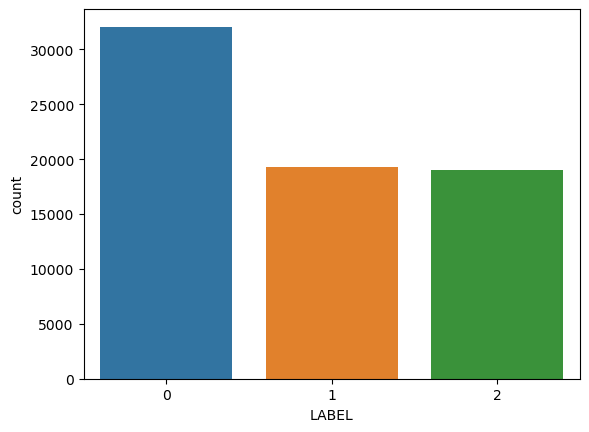

In [9]:
sns.countplot(x='LABEL', data=train)
label_counts = train['LABEL'].value_counts()
print(label_counts)

### Classification Model - Logistic Regression

#### Logistic Regression - Process data

In [10]:
### Separate texts and labels
traintexts = train['TEXT']
trainlabels = train['LABEL']
testtexts = test['TEXT']

#### Logistic Regression - Define feature transformation

In [11]:
class TextToFeatures:
    def __init__(self):
        self.vectorizer = CountVectorizer(decode_error='ignore')
    
    def transform(self, texts):
        return self.vectorizer.transform(texts)

    def fit_transform(self, texts):
        return self.vectorizer.fit_transform(texts)

#### Logistic Regression - Define classifier

In [12]:
class Classifier:
    def __init__(self):
        self.model = LogisticRegression()

    def fit(self, features, labels):
        self.model.fit(features, labels)

    def predict(self, features):
        return self.model.predict(features)

#### Logistic Regression - Prediction and evaluation

In [13]:
ttf = TextToFeatures()
features = ttf.fit_transform(traintexts)

classifier = Classifier()
classifier.fit(features, trainlabels)

test_features = ttf.transform(testtexts)
predictions = classifier.predict(test_features)

C:\Users\kiwoo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
test['LABEL'] = predictions

test.drop(columns=['TEXT'], inplace=True)

save_path = os.path.join(DATA_ROOT, 'sample_submission.csv')
test.to_csv(save_path, index=False)

In [ ]:
print(test.shape[0])